# Creating A Training Set From s2p data


## Import pyMez and pyMez.Code.Analysis.SParameter  

In [1]:
import os
from pyMez import *
from pyMez.Code.Analysis.SParameter import *
from pyMez.Code.DataHandlers.NISTModels import *
from pyMez.Code.DataHandlers.Translations import *
import sys
sys.path.insert(0, '..')
#from Machine_Learning import *
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis


Importing pyMez, this should take roughly 30 seconds
Importing Code.DataHandlers.GeneralModels
It took 0.987 s to import Code.DataHandlers.GeneralModels
Importing Code.DataHandlers.HTMLModels
It took 0.152 s to import Code.DataHandlers.HTMLModels
Importing Code.DataHandlers.NISTModels
It took 1.638 s to import Code.DataHandlers.NISTModels
Importing Code.DataHandlers.TouchstoneModels
It took 0.0 s to import Code.DataHandlers.TouchstoneModels
Importing Code.DataHandlers.XMLModels
It took 0.1 s to import Code.DataHandlers.XMLModels
Importing Code.DataHandlers.ZipModels
It took 0.01 s to import Code.DataHandlers.ZipModels
Importing Code.InstrumentControl.Experiments
It took 1.92 s to import Code.InstrumentControl.Experiments
Importing Code.InstrumentControl.Instruments
It took 0.0 s to import Code.InstrumentControl.Instruments
Importing Code.Utils.Names
It took 0.0 s to import Code.Utils.Names
It took 4.807 s to import all of the active modules


In [2]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import RidgeClassifier, SGDClassifier, PassiveAggressiveClassifier, Perceptron
from sklearn.svm import SVC
classifier_dict = {"QDA": QuadraticDiscriminantAnalysis,
                   "Bernoulli Naive Bayes": BernoulliNB,
                   "Decision Tree": DecisionTreeClassifier,
                   "Random Forest": RandomForestClassifier,
                   "Ridge": RidgeClassifier,
                   "SGD": SGDClassifier,
                   "Passive Aggressive": PassiveAggressiveClassifier,
                   "Perceptron": Perceptron}

## Define the files to be imported

In [5]:
# A little different way of doing it 
# Read all the folders and create a dictionary
pretrain_folder=r"E:\Share\Scattering Parameter ML Training Set\TypeN_20190211\PreTrain"
pretrain_folders=os.listdir(pretrain_folder)
device_type_dictionary={index:value for index,value in enumerate(pretrain_folders)}
device_type_dictionary_inverse={value:index for index,value in enumerate(pretrain_folders)}
pretrain_folders=map(lambda x:os.path.join(pretrain_folder,x),pretrain_folders)

In [6]:
print(device_type_dictionary)

{0: 'Load', 1: 'Load_Position_10', 2: 'Load_Position_4', 3: 'Load_Position_5', 4: 'Load_Position_6', 5: 'Load_Position_7', 6: 'Load_Position_8', 7: 'Load_Position_9', 8: 'Open', 9: 'Open_Position_10', 10: 'Open_Position_4', 11: 'Open_Position_5', 12: 'Open_Position_6', 13: 'Open_Position_7', 14: 'Open_Position_8', 15: 'Open_Position_9', 16: 'Short', 17: 'Short_Position_10', 18: 'Short_Position_4', 19: 'Short_Position_5', 20: 'Short_Position_6', 21: 'Short_Position_7', 22: 'Short_Position_8', 23: 'Short_Position_9', 24: 'Thru', 25: 'Thru_Position_10', 26: 'Thru_Position_4', 27: 'Thru_Position_5', 28: 'Thru_Position_6', 29: 'Thru_Position_7', 30: 'Thru_Position_8', 31: 'Thru_Position_9'}


In [10]:
def create_s2p_training_set(pretrain_folder,number_training_sets=1000,expansion_factor=1.0,minimum_noise=1*10**-8):
    """Given a directory containing multiple measurements this creates a list of np.arrays to 
    train a classifier"""
    pretrain_files=os.listdir(pretrain_folder)
    #print("The number of pretrain files is {0}, \nthe pretrain folder is {1}".format(len(pretrain_files), pretrain_folder))
    pretrain_files=map(lambda x:os.path.join(pretrain_folder,x),pretrain_files)
    # now open the files convert them to AsciiData Tables and find the mean and standard deviation
    first_file=Snp_to_AsciiDataTable(SNP(pretrain_files[0]))
    joined_file=first_file.copy()
    for file_name in pretrain_files[1:]:
        joined_file=joined_file+Snp_to_AsciiDataTable(SNP(file_name))
    mean_file=frequency_model_collapse_multiple_measurements(joined_file)
    std_file=frequency_model_collapse_multiple_measurements(joined_file,method="std")
    mean_array=AsciiDataTable_to_NumpyArray(mean_file,exclude_columns="Frequency")
    std_array=AsciiDataTable_to_NumpyArray(std_file,exclude_columns="Frequency")
    
    training_arrays=np.array([np.random.normal(loc=mean_value,scale=expansion_factor*std_array[index]+minimum_noise,
                                               size=number_training_sets) for index,
                              mean_value in enumerate(mean_array)])

    training_arrays=[[training_arrays[i][j] 
                      for i in range(len(mean_array))] for j in range(number_training_sets)]
    return training_arrays

def percent_correct(target_list,prediction_list):
    """Calculates the number of correct predictions"""
    number_correct=0
    for index,value in enumerate(target_list):
        if prediction_list[index]==value:
            number_correct+=1
    return 100*float(number_correct)/float(len(target_list))




In [8]:
pretrain_folders

['E:\\Share\\Scattering Parameter ML Training Set\\TypeN_20190211\\PreTrain\\Load',
 'E:\\Share\\Scattering Parameter ML Training Set\\TypeN_20190211\\PreTrain\\Load_Position_10',
 'E:\\Share\\Scattering Parameter ML Training Set\\TypeN_20190211\\PreTrain\\Load_Position_4',
 'E:\\Share\\Scattering Parameter ML Training Set\\TypeN_20190211\\PreTrain\\Load_Position_5',
 'E:\\Share\\Scattering Parameter ML Training Set\\TypeN_20190211\\PreTrain\\Load_Position_6',
 'E:\\Share\\Scattering Parameter ML Training Set\\TypeN_20190211\\PreTrain\\Load_Position_7',
 'E:\\Share\\Scattering Parameter ML Training Set\\TypeN_20190211\\PreTrain\\Load_Position_8',
 'E:\\Share\\Scattering Parameter ML Training Set\\TypeN_20190211\\PreTrain\\Load_Position_9',
 'E:\\Share\\Scattering Parameter ML Training Set\\TypeN_20190211\\PreTrain\\Open',
 'E:\\Share\\Scattering Parameter ML Training Set\\TypeN_20190211\\PreTrain\\Open_Position_10',
 'E:\\Share\\Scattering Parameter ML Training Set\\TypeN_20190211\\Pre

In [11]:
number_training_sets=1000
expansion_factor=1
sorted_device_keys=sorted(device_type_dictionary.keys())
training_array=[]

for key in sorted_device_keys:
    print("Working on {0}".format(key))
    training_array=training_array+create_s2p_training_set(os.path.join(pretrain_folder,
                                                               "{0}".format(device_type_dictionary[key])),
                                                              number_training_sets,expansion_factor=expansion_factor)
target_array=[]
for key_index,key in enumerate(sorted_device_keys):
    target_array=target_array+[key for i in range(number_training_sets)]


Working on 0
Working on 1
Working on 2
Working on 3
Working on 4
Working on 5
Working on 6
Working on 7
Working on 8
Working on 9
Working on 10
Working on 11
Working on 12
Working on 13
Working on 14
Working on 15
Working on 16
Working on 17
Working on 18
Working on 19
Working on 20
Working on 21
Working on 22
Working on 23
Working on 24
Working on 25
Working on 26
Working on 27
Working on 28
Working on 29
Working on 30
Working on 31


In [60]:
len(target_array)

29000

In [12]:
classifier=QuadraticDiscriminantAnalysis()
classifier.fit(training_array,target_array)


C:\python27\lib\site-packages\sklearn\discriminant_analysis.py:688: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
               store_covariances=False, tol=0.0001)

In [13]:
base_predictions=classifier.predict(training_array)
base_correct=percent_correct(target_array,base_predictions)
print("The correct percentage is {0}".format(base_correct))

The correct percentage is 100.0


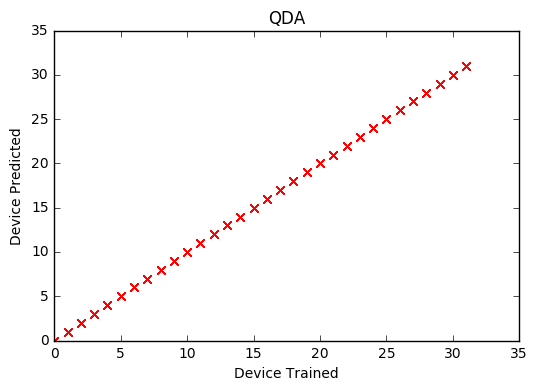

In [14]:
plt.plot(target_array,base_predictions,"rx")
plt.xlabel("Device Trained")
plt.ylabel("Device Predicted")
plt.title("QDA")
plt.show()

The correct percentage is 100.0


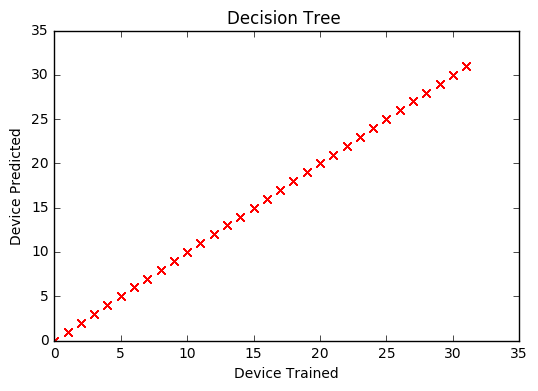

In [15]:
two_port_classifier=DecisionTreeClassifier()
two_port_classifier.fit(training_array, target_array)
d_base_predictions=two_port_classifier.predict(training_array)
d_base_correct=percent_correct(target_array,d_base_predictions)
print("The correct percentage is {0}".format(d_base_correct))
plt.plot(target_array,d_base_predictions,"rx")
plt.xlabel("Device Trained")
plt.ylabel("Device Predicted")
plt.title("Decision Tree ")
plt.show()

The correct percentage is 100.0


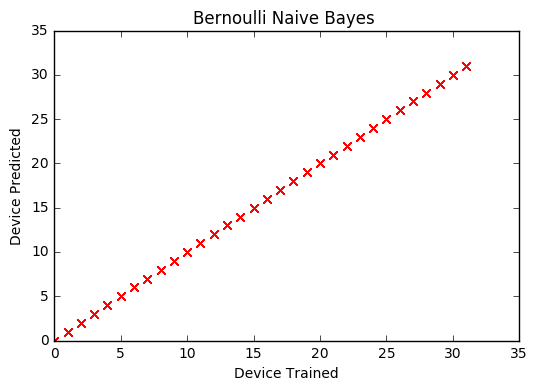

In [20]:
BNB_classifier=BernoulliNB()
BNB_classifier.fit(training_array, target_array)
BNB_base_predictions=BNB_classifier.predict(training_array)
BNB_base_correct=percent_correct(target_array,BNB_base_predictions)
print("The correct percentage is {0}".format(BNB_base_correct))
plt.plot(target_array,BNB_base_predictions,"rx")
plt.xlabel("Device Trained")
plt.ylabel("Device Predicted")
plt.title("Bernoulli Naive Bayes ")
plt.show()

The correct percentage is 100.0


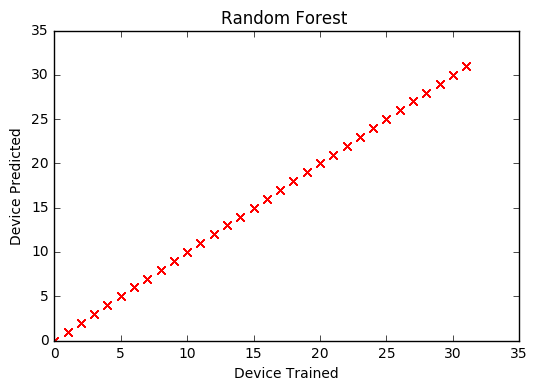

In [21]:
RF_classifier=RandomForestClassifier()
RF_classifier.fit(training_array, target_array)
RF_base_predictions=RF_classifier.predict(training_array)
RF_base_correct=percent_correct(target_array,RF_base_predictions)
print("The correct percentage is {0}".format(RF_base_correct))
plt.plot(target_array,RF_base_predictions,"rx")
plt.xlabel("Device Trained")
plt.ylabel("Device Predicted")
plt.title("Random Forest ")
plt.show()

The correct percentage is 100.0


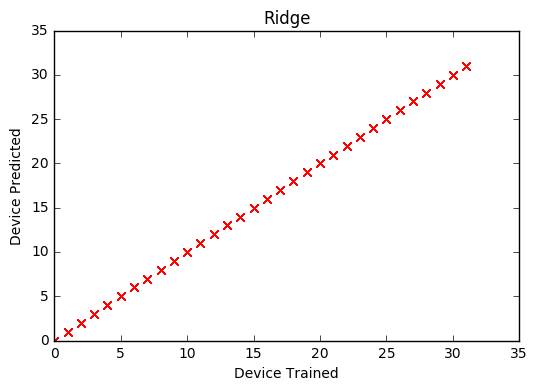

In [23]:
Ridge_classifier=RidgeClassifier()
Ridge_classifier.fit(training_array, target_array)
Ridge_base_predictions=Ridge_classifier.predict(training_array)
Ridge_base_correct=percent_correct(target_array,Ridge_base_predictions)
print("The correct percentage is {0}".format(Ridge_base_correct))
plt.plot(target_array,Ridge_base_predictions,"rx")
plt.xlabel("Device Trained")
plt.ylabel("Device Predicted")
plt.title("Ridge")
plt.show()

The correct percentage is 87.49375


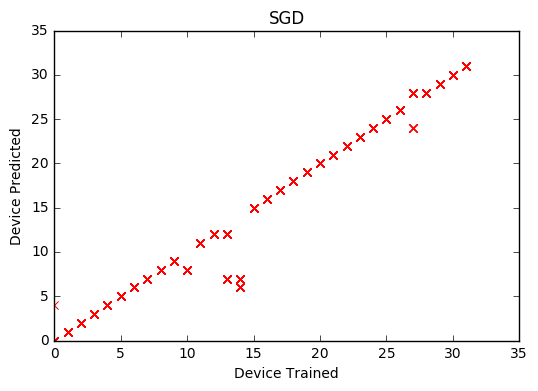

In [24]:
SGD_classifier=SGDClassifier()
SGD_classifier.fit(training_array, target_array)
SGD_base_predictions=SGD_classifier.predict(training_array)
SGD_base_correct=percent_correct(target_array,SGD_base_predictions)
print("The correct percentage is {0}".format(SGD_base_correct))
plt.plot(target_array,SGD_base_predictions,"rx")
plt.xlabel("Device Trained")
plt.ylabel("Device Predicted")
plt.title("SGD")
plt.show()

The correct percentage is 93.815625


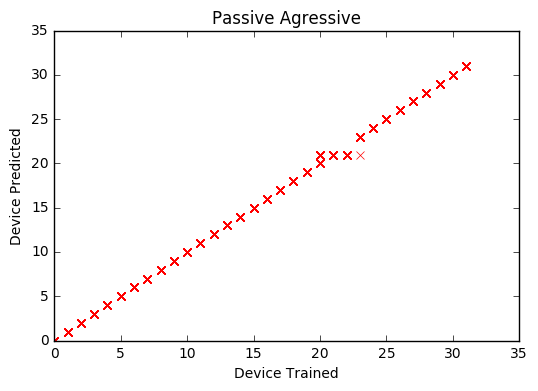

In [25]:
PA_classifier=PassiveAggressiveClassifier()
PA_classifier.fit(training_array, target_array)
PA_base_predictions=PA_classifier.predict(training_array)
PA_base_correct=percent_correct(target_array,PA_base_predictions)
print("The correct percentage is {0}".format(PA_base_correct))
plt.plot(target_array,PA_base_predictions,"rx")
plt.xlabel("Device Trained")
plt.ylabel("Device Predicted")
plt.title("Passive Agressive")
plt.show()

The correct percentage is 97.053125


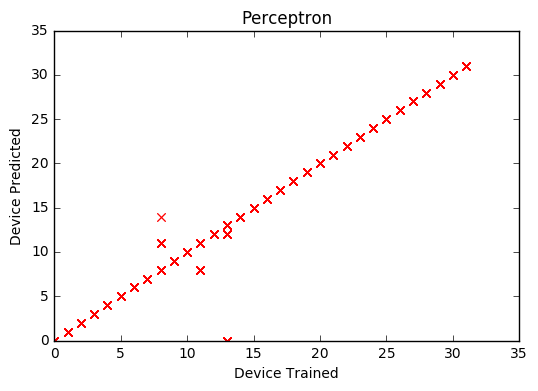

In [27]:
Perceptron_classifier=Perceptron()
Perceptron_classifier.fit(training_array, target_array)
Perceptron_base_predictions=Perceptron_classifier.predict(training_array)
Perceptron_base_correct=percent_correct(target_array,Perceptron_base_predictions)
print("The correct percentage is {0}".format(Perceptron_base_correct))
plt.plot(target_array,Perceptron_base_predictions,"rx")
plt.xlabel("Device Trained")
plt.ylabel("Device Predicted")
plt.title("Perceptron")
plt.show()

In [28]:
#Build a test folder from the training folders
test_folder=r"E:\Share\Scattering Parameter ML Training Set\TypeN_20190211\Test_Pretrain_Data"
test_target_dictionary={}
for folder in pretrain_folders:
    device_type=folder.split("\\")[-1]
    for s2p_name in os.listdir(folder):
        s2p_path=os.path.join(folder,s2p_name)
        if os.path.isfile(s2p_path):
            s2p=S2PV1(s2p_path)
            s2p.save(os.path.join(test_folder,device_type+"_"+s2p_name))
            test_target_dictionary[device_type+"_"+s2p_name]=device_type

In [29]:
#test_folder=r"C:\Share\Scattering Parameter ML Training Set\Test Set 1"
test_files=os.listdir(test_folder)
#test_target_list=[list(device_type_dictionary.keys())[list(device_type_dictionary.values()).index(test_target_dictionary[key])] for key in test_files]
test_files=map(lambda x:os.path.join(test_folder,x),test_files)

In [30]:
len(test_files)

173

In [31]:
test_array=[]
#test_target_list=[]
for file_name in test_files:
    test_array=test_array+[AsciiDataTable_to_NumpyArray(Snp_to_AsciiDataTable(SNP(file_name)),exclude_columns="Frequency")]
    #test_target_list.append(device_type_dictionary_inverse[test_target_dictionary[os.path.basename(file_name)]])
predictions=two_port_classifier.predict(test_array)
file_name_predictions={test_files[index]:device_type_dictionary[key] for index,key in enumerate(predictions.tolist())}

In [ ]:
for key,value in file_name_predictions.iteritems():
    print("{0} is type {1}".format(os.path.basename(key),value))

In [94]:
predictions

array([ 2,  2,  2,  2,  3,  3,  3,  4,  3,  1,  1,  5,  6,  6,  5,  1,  1,
        1,  7,  7,  5,  7,  1,  1,  1,  2,  2,  2,  3,  3,  3,  4,  4,  4,
        5,  5,  5,  6,  1,  6,  7,  7,  7,  8,  8, 10,  8,  8, 11,  8,  8,
       11,  8, 12, 10,  8,  8,  8,  9,  9,  9, 10, 10, 10, 11, 11, 11, 12,
       12, 12, 14, 14, 14, 15, 15, 15, 16, 16, 16, 17, 17, 17, 18, 18, 18,
       19, 19, 19, 20, 20, 20, 17, 17, 19, 18, 16, 16, 20, 17, 14, 18, 17,
       17, 14, 13, 20, 20, 14, 13, 17, 17, 17, 22, 22, 22, 23, 23, 23, 24,
       28, 23, 25, 22, 25, 26, 26, 26, 27, 27, 27, 28, 28, 28, 23, 23, 23,
       21, 23, 27, 27, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23,
       23])

In [32]:
accuracy=0
device_type_accuracy=0
sorted_keys=sorted(file_name_predictions.keys())
sorted_values=[file_name_predictions[key] for key in sorted_keys]

for index,test_name in enumerate(sorted_keys):
    device_type=sorted_values[index]
    base_device_type=device_type.split("_")[0]
    if re.search(device_type,test_name):
        accuracy+=1
    if re.search(base_device_type,test_name):
        device_type_accuracy+=1
    else:
        print("{0} is not of type {1}".format(test_name,base_device_type))
    #print("The device_type is {0}, the base_device_type is {1} and the  test_name is {2}".format(device_type,base_device_type,test_name))
print("The accuracy is {0}".format(100*accuracy/float(len(sorted_keys))))
print("The device_type_accuracy is {0}".format(100*device_type_accuracy/float(len(sorted_keys))))

The accuracy is 99.4219653179
The device_type_accuracy is 100.0


In [33]:
classifer_list=[classifier,BNB_classifier,two_port_classifier,
                RF_classifier,Ridge_classifier,SGD_classifier,PA_classifier,Perceptron_classifier]
classifer_name_list=["Quadratic Discriminant","Bernoulli Naive Bayes","Decision Tree",
                     "Random Forest","Ridge", "SGD","Passive Aggresive","Perceptron"]
for classifier_index,new_classifier in enumerate(classifer_list):
    predictions=new_classifier.predict(test_array)
    file_name_predictions={test_files[index]:device_type_dictionary[key] for index,key in enumerate(predictions.tolist())}    
    accuracy=0
    device_type_accuracy=0
    sorted_keys=sorted(file_name_predictions.keys())
    sorted_values=[file_name_predictions[key] for key in sorted_keys]

    for index,test_name in enumerate(sorted_keys):
        device_type=sorted_values[index]
        base_device_type=device_type.split("_")[0]
        if re.search(device_type,test_name):
            accuracy+=1
        if re.search(base_device_type,test_name):
            device_type_accuracy+=1
        else:
            print("{0} is not of type {1} for {2}".format(test_name,base_device_type,classifer_name_list[classifier_index]))
        #print("The device_type is {0}, the base_device_type is {1} and the  test_name is {2}".format(device_type,base_device_type,test_name))
    print("The total accuracy of {0} is  {1}".format(classifer_name_list[classifier_index],100*accuracy/float(len(sorted_keys))))
    print("The device_type_accuracy of {0} is {1}".format(classifer_name_list[classifier_index],100*device_type_accuracy/float(len(sorted_keys))))

The total accuracy of Quadratic Discriminant is  64.7398843931
The device_type_accuracy of Quadratic Discriminant is 100.0
The total accuracy of Bernoulli Naive Bayes is  100.0
The device_type_accuracy of Bernoulli Naive Bayes is 100.0
The total accuracy of Decision Tree is  99.4219653179
The device_type_accuracy of Decision Tree is 100.0
The total accuracy of Random Forest is  100.0
The device_type_accuracy of Random Forest is 100.0
The total accuracy of Ridge is  99.4219653179
The device_type_accuracy of Ridge is 100.0
E:\Share\Scattering Parameter ML Training Set\TypeN_20190211\Test_Pretrain_Data\Open_Position_4_Open_Position_4_Connect_20190208_001.s2p is not of type Load for SGD
E:\Share\Scattering Parameter ML Training Set\TypeN_20190211\Test_Pretrain_Data\Open_Position_5_Open_Position_5_Connect_20190208_003.s2p is not of type Load for SGD
E:\Share\Scattering Parameter ML Training Set\TypeN_20190211\Test_Pretrain_Data\Open_Position_7_Open_Position_7_Connect_20190208_002.s2p is not

In [108]:
device_key=13
print("There are {0} of {1}".format(predictions.tolist().count(device_key),device_type_dictionary[device_key]))

There are 2 of Short


In [35]:
#Build a test folder from the training folders
new_test_folder=r"E:\Share\Scattering Parameter ML Training Set\TypeN_20190211\Test"
new_test_folders=os.listdir(new_test_folder)

new_test_folders=map(lambda x:os.path.join(new_test_folder,x),new_test_folders)
random_test_folder=r"E:\Share\Scattering Parameter ML Training Set\TypeN_20190211\Test_Random_Data"
test_target_dictionary={}
for folder in new_test_folders:
    device_type=folder.split("\\")[-1]
    for s2p_name in os.listdir(folder):
        s2p_path=os.path.join(folder,s2p_name)
        if os.path.isfile(s2p_path):
            s2p=S2PV1(s2p_path)
            s2p.save(os.path.join(random_test_folder,device_type+"_"+s2p_name))
            test_target_dictionary[device_type+"_"+s2p_name]=device_type

In [36]:
#test_folder=r"C:\Share\Scattering Parameter ML Training Set\Test Set 1"
random_test_files=os.listdir(random_test_folder)
random_test_files=map(lambda x:os.path.join(random_test_folder,x),random_test_files)
random_test_array=[]

for file_name in random_test_files:
    random_test_array=random_test_array+[AsciiDataTable_to_NumpyArray(Snp_to_AsciiDataTable(SNP(file_name)),exclude_columns="Frequency")]



In [37]:
classifer_list=[classifier,BNB_classifier,two_port_classifier,
                RF_classifier,Ridge_classifier,SGD_classifier,PA_classifier,Perceptron_classifier]
classifer_name_list=["Quadratic Discriminant","Bernoulli Naive Bayes","Decision Tree",
                     "Random Forest","Ridge", "SGD","Passive Aggresive","Perceptron"]
for classifier_index,new_classifier in enumerate(classifer_list):
    predictions=new_classifier.predict(random_test_array)
    file_name_predictions={random_test_files[index]:device_type_dictionary[key] for index,key in enumerate(predictions.tolist())}    
    accuracy=0
    device_type_accuracy=0
    sorted_keys=sorted(file_name_predictions.keys())
    sorted_values=[file_name_predictions[key] for key in sorted_keys]

    for index,test_name in enumerate(sorted_keys):
        device_type=sorted_values[index]
        base_device_type=device_type.split("_")[0]
        if re.search(device_type,test_name):
            accuracy+=1
        if re.search(base_device_type,test_name):
            device_type_accuracy+=1
        else:
            print("{0} is not of type {1} for {2}".format(test_name,base_device_type,classifer_name_list[classifier_index]))
        #print("The device_type is {0}, the base_device_type is {1} and the  test_name is {2}".format(device_type,base_device_type,test_name))
    print("The total accuracy of {0} is  {1}".format(classifer_name_list[classifier_index],100*accuracy/float(len(sorted_keys))))
    print("The device_type_accuracy of {0} is {1}".format(classifer_name_list[classifier_index],100*device_type_accuracy/float(len(sorted_keys))))

The total accuracy of Quadratic Discriminant is  25.4901960784
The device_type_accuracy of Quadratic Discriminant is 100.0
The total accuracy of Bernoulli Naive Bayes is  96.0784313725
The device_type_accuracy of Bernoulli Naive Bayes is 100.0
The total accuracy of Decision Tree is  82.3529411765
The device_type_accuracy of Decision Tree is 100.0
The total accuracy of Random Forest is  74.5098039216
The device_type_accuracy of Random Forest is 100.0
E:\Share\Scattering Parameter ML Training Set\TypeN_20190211\Test_Random_Data\Short_Position_4_Short_Position_4_Connect_20190208_003.s2p is not of type Load for Ridge
E:\Share\Scattering Parameter ML Training Set\TypeN_20190211\Test_Random_Data\Short_Position_5_Short_Position_5_Connect_20190208_001.s2p is not of type Load for Ridge
E:\Share\Scattering Parameter ML Training Set\TypeN_20190211\Test_Random_Data\Short_Position_5_Short_Position_5_Connect_20190208_003.s2p is not of type Load for Ridge
The total accuracy of Ridge is  86.2745098039